### What is the objective of this project? 

The objective for this project is to:



### How should the problem be framed? 

We should use a classification algorithm as we are looking to predict whether a given employee will attrite.

![lihtc](https://camo.githubusercontent.com/af8ed0a0f65baaa8c90afabbd29e8b1fbc19b48fcf63b86028d5143a0d22acb9/68747470733a2f2f7777772e696864612e6f72672f77702d636f6e74656e742f75706c6f6164732f323031352f30382f494844412d4c6f772d496e636f6d652d5461782d4372656469742d30322d332e6a7067)

In [413]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load data

In [414]:
pd.set_option('display.max_rows', None)

In [415]:
pathname = '/Users/blakenicholson/Documents/Personal/Coding/DataAnalysis-LIHTC/LIHTCPUB.CSV'

In [416]:
df = pd.read_csv(pathname, low_memory=False)

In [417]:
df.shape

(49449, 75)

In [418]:
df.columns

Index(['hud_id', 'project', 'proj_add', 'proj_cty', 'proj_st', 'proj_zip',
       'state_id', 'latitude', 'longitude', 'place1990', 'place2000',
       'place2010', 'fips1990', 'fips2000', 'fips2010', 'st2010', 'cnty2010',
       'scattered_site_cd', 'resyndication_cd', 'allocamt', 'n_units',
       'li_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'inc_ceil',
       'low_ceil', 'ceilunit', 'yr_pis', 'yr_alloc', 'non_prof', 'basis',
       'bond', 'mff_ra', 'fmha_514', 'fmha_515', 'fmha_538', 'home',
       'home_amt', 'tcap', 'tcap_amt', 'cdbg', 'cdbg_amt', 'htf', 'htf_amt',
       'fha', 'hopevi', 'hpvi_amt', 'tcep', 'tcep_amt', 'rad', 'qozf',
       'qozf_amt', 'rentassist', 'trgt_pop', 'trgt_fam', 'trgt_eld',
       'trgt_dis', 'trgt_hml', 'trgt_other', 'trgt_spc', 'type', 'credit',
       'n_unitsr', 'li_unitr', 'metro', 'dda', 'qct', 'nonprog', 'nlm_reason',
       'nlm_spc', 'datanote', 'record_stat'],
      dtype='object')

Let's check out the first few rows.

In [400]:
df.head()

hud_id                             project            proj_add  \
0  AKA0000X003               EAGLE RIDGE TOWNHOMES    1775 NORTH THUMA   
1  AKA0000X018  GATEWAY-SEWARD ASSOCIATES, LTD PTN   1810 PHOENIX ROAD   
2  AKA0000X022      JUNEAU AFFORDABLE RENTALS, LLC      SCATTERED SITE   
3  AKA0000X024             MILL BAY TOWNHOMES, LLC  1223 MILL BAY ROAD   
4  AKA0000X030                TURNAGAIN PLACE APTS       2708 COHO WAY   

    proj_cty proj_st proj_zip  state_id   latitude   longitude  place1990  \
0     PALMER      AK    99645  AK-05-23  61.587872 -149.099777        NaN   
1     SEWARD      AK    99664  AK-99-99  60.125469 -149.446060        NaN   
2     JUNEAU      AK    99801  AK-99-99  58.383499 -134.437698        NaN   
3     KODIAK      AK    99615  AK-99-99  57.796478 -152.392319        NaN   
4  ANCHORAGE      AK    99517  AK-99-99  61.205101 -149.930298        NaN   

   ...  n_unitsr  li_unitr metro dda qct  nonprog  nlm_reason  nlm_spc  \
0  ...      33.0      33.0   1.0 NaN NaN      NaN         NaN      NaN   
1  ...      20.0      20.0   NaN NaN NaN      NaN         NaN      NaN   
2  ...      25.0      25.0   NaN NaN NaN      NaN         NaN      NaN   
3  ...      20.0      20.0   NaN NaN NaN      NaN         NaN      NaN   
4  ...      29.0      29.0   NaN NaN NaN      NaN         NaN      NaN   

   datanote  record_stat  
0       NaN            X  
1       NaN            X  
2       NaN            U  
3       NaN            X  
4       NaN            U  

[5 rows x 75 columns]

In [401]:
df[0:4].T

0                                   1  \
hud_id                       AKA0000X003                         AKA0000X018   
project            EAGLE RIDGE TOWNHOMES  GATEWAY-SEWARD ASSOCIATES, LTD PTN   
proj_add                1775 NORTH THUMA                   1810 PHOENIX ROAD   
proj_cty                          PALMER                              SEWARD   
proj_st                               AK                                  AK   
proj_zip                           99645                               99664   
state_id                        AK-05-23                            AK-99-99   
latitude                         61.5879                             60.1255   
longitude                         -149.1                            -149.446   
place1990                            NaN                                 NaN   
place2000                            NaN                                 NaN   
place2010                          58660                               68560   
fips1990                     02XXXXXXXXX                         02XXXXXXXXX   
fips2000                      2170001200                         02XXXXXXXXX   
fips2010                      2170001201                          2122001300   
st2010                                 2                                   2   
cnty2010                             170                                 122   
scattered_site_cd                    NaN                                 NaN   
resyndication_cd                     NaN                                 NaN   
allocamt                             NaN                                 NaN   
n_units                               33                                  20   
li_units                               0                                 NaN   
n_0br                                  0                                 NaN   
n_1br                                  0                                 NaN   
n_2br                                  0                                 NaN   
n_3br                                  0                                 NaN   
n_4br                                  0                                 NaN   
inc_ceil                               9                                   9   
low_ceil                             NaN                                 NaN   
ceilunit                               0                                 NaN   
yr_pis                              8888                                9999   
yr_alloc                            8888                                9999   
non_prof                             NaN                                 NaN   
basis                                NaN                                 NaN   
bond                                 NaN                                 NaN   
mff_ra                               NaN                                 NaN   
fmha_514                             NaN                                 NaN   
fmha_515                             NaN                                 NaN   
fmha_538                             NaN                                 NaN   
home                                 NaN                                 NaN   
home_amt                               0                                   0   
tcap                                 NaN                                 NaN   
tcap_amt                               0                                   0   
cdbg                                 NaN                                 NaN   
cdbg_amt                               0                                   0   
htf                                  NaN                                 NaN   
htf_amt                                0                                   0   
fha                                  NaN                                 NaN   
hopevi                               NaN                                 NaN   
hpvi_amt                               

In [402]:
df.describe().T

count           mean           std          min  \
latitude           47036.0      38.240306  4.975487e+00     0.000000   
longitude          47036.0     -90.888845  1.642309e+01  -166.780594   
place1990          31804.0    1716.430135  1.490026e+03     3.000000   
place2000          38851.0   39167.335152  2.303717e+04   100.000000   
place2010          46949.0   45958.198194  2.678098e+04   100.000000   
st2010             49449.0      29.670671  1.556542e+01     1.000000   
cnty2010           47036.0      91.129922  1.070671e+02     1.000000   
scattered_site_cd  43863.0       1.972095  1.647027e-01     1.000000   
resyndication_cd    5998.0       1.937479  2.421193e-01     1.000000   
allocamt           30703.0  555464.998576  1.440135e+06     0.000000   
n_units            49054.0      67.625841  7.725358e+01     0.000000   
li_units           46332.0      59.804541  7.118038e+01     0.000000   
n_0br              39559.0       3.426831  1.763345e+01     0.000000   
n_1br              39958.0      21.466590  3.696884e+01     0.000000   
n_2br              39987.0      24.618301  3.874512e+01     0.000000   
n_3br              39827.0      11.204309  2.193184e+01     0.000000   
n_4br              39525.0       1.626616  7.088832e+00     0.000000   
inc_ceil           31319.0       2.705674  2.280402e+00     1.000000   
low_ceil           23610.0       1.512961  4.998426e-01     1.000000   
ceilunit           16827.0      21.651810  3.084995e+01     0.000000   
yr_pis             49449.0    2569.076463  1.931146e+03  1987.000000   
yr_alloc           49444.0    2521.394204  1.873979e+03  1987.000000   
non_prof           39621.0       1.785821  4.102570e-01     1.000000   
basis              39009.0       1.724935  4.465526e-01     1.000000   
bond               38285.0       1.834530  3.716086e-01     1.000000   
mff_ra             13976.0       1.872210  3.338683e-01     1.000000   
fmha_514           20754.0       1.997013  5.457651e-02     1.000000   
fmha_515           38568.0       1.887653  3.157970e-01     1.000000   
fmha_538           19294.0       1.991500  9.180543e-02     1.000000   
home               28950.0       1.842867  3.639324e-01     1.000000   
home_amt           32167.0  120924.492679  6.305072e+05     0.000000   
tcap               11115.0       1.977868  1.471202e-01     1.000000   
tcap_amt           16853.0   28896.634724  5.204963e+05     0.000000   
cdbg               26064.0       1.963666  1.871226e-01     1.000000   
cdbg_amt           29403.0   14620.051695  2.324672e+05     0.000000   
htf                 4679.0       1.992520  8.617345e-02     1.000000   
htf_amt             8319.0    3090.469528  7.094599e+04     0.000000   
fha                25217.0       1.986676  1.146618e-01     1.000000   
hopevi             20020.0       1.995055  7.014875e-02     1.000000   
hpvi_amt           24036.0    4872.128349  1.981144e+05     0.000000   
tcep               16074.0       1.926216  2.614268e-01     1.000000   
tcep_amt           21703.0  202067.578807  1.312914e+06     0.000000   
rad                 4508.0       1.981810  1.336524e-01     1.000000   
qozf                2322.0       1.999139  2.934204e-02     1.000000   
qozf_amt            8319.0       0.000000  0.000000e+00     0.000000   
rentassist         23637.0       3.460253  1.145675e+00     1.000000   
trgt_pop           33588.0       1.275158  4.466004e-01     1.000000   
trgt_fam           27088.0       1.290202  5.882684e-01     0.000000   
trgt_eld           25548.0       1.208353  8.018049e-01     0.000000   
trgt_dis           25223.0       1.156722  8.937593e-01     0.000000   
trgt_hml           23436.0       1.125576  9.488166e-01     0.000000   
trgt_other         24805.0       1.122314  9.265237e-01     0.000000   
type               42941.0       1.418458  5.488212e-01     1.000000   
credit             38705.0       1.946234  8.326717e-01     1.000000   
n_unitsr           49314.0      67.695665  7.769138e+01     0

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49449 entries, 0 to 49448
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hud_id             49449 non-null  object 
 1   project            49448 non-null  object 
 2   proj_add           48465 non-null  object 
 3   proj_cty           49409 non-null  object 
 4   proj_st            49449 non-null  object 
 5   proj_zip           46333 non-null  object 
 6   state_id           48864 non-null  object 
 7   latitude           47036 non-null  float64
 8   longitude          47036 non-null  float64
 9   place1990          31804 non-null  float64
 10  place2000          38851 non-null  float64
 11  place2010          46949 non-null  float64
 12  fips1990           49449 non-null  object 
 13  fips2000           49449 non-null  object 
 14  fips2010           49449 non-null  object 
 15  st2010             49449 non-null  int64  
 16  cnty2010           470

In [302]:
pd.set_option('display.max_rows', None)

# Data Cleaning

In [181]:
pd.set_option('display.max_rows', None)

using data dictionary found here: https://github.com/bnicholson206/DataAnalysis-LIHTC/blob/main/LIHTC%20Data%20Dictionary%202019.pdf

Convert all floats to Integers

In [381]:
df_num = df.select_dtypes(include='float')

In [405]:
df[df_num.columns] = df[df_num.columns].fillna(0)

In [407]:
df[df_num.columns] = df[df_num.columns].astype('int')

In [391]:
df['scattered_site_cd'].value_counts()

No     42639
Yes     1224
Name: scattered_site_cd, dtype: int64

In [411]:
df['resyndication_cd'].value_counts()

Series([], Name: resyndication_cd, dtype: int64)

In [384]:
df['inc_ceil'].value_counts()

Series([], Name: inc_ceil, dtype: int64)

In [385]:
df['home'].value_counts()

2    24401
0    20499
1     4549
Name: home, dtype: int64

In [386]:
df['tcap'].value_counts()

0    38334
2    10869
1      246
Name: tcap, dtype: int64

In [337]:
df['cdbg'].value_counts() # community development block grant (CDBG) funds

2    25117
0    23385
1      947
Name: cdbg, dtype: int64

In [338]:
df['htf'].value_counts() # Housing Trust Fund

0    44770
2     4644
1       35
Name: htf, dtype: int64

In [339]:
df['fha'].value_counts() #FHA-insured loan

2    24881
0    24232
1      336
Name: fha, dtype: int64

In [340]:
df['hopevi'].value_counts() # Forms part of a HOPEVI development

0    29429
2    19921
1       99
Name: hopevi, dtype: int64

In [341]:
df['tcep'].value_counts() # Tax Credit Exchange Program (TCEP) funds

0    33375
2    14888
1     1186
Name: tcep, dtype: int64

In [342]:
df['rad'].value_counts() # Housing Trust Fund funds

0    44941
2     4426
1       82
Name: rad, dtype: int64

In [343]:
df['nlm_reason'].value_counts() # Reason property is no longer monitored for LIHTC

0    48765
1      416
3      179
2       89
Name: nlm_reason, dtype: int64

In [378]:
df['record_stat'].value_counts() # Record status compared to previous version of LIHTC database

Existing    42048
Updated      6178
New          1223
Name: record_stat, dtype: int64

In [345]:
df['credit'].value_counts() # Type of credit percentage

2    19369
1    11977
0    10744
3     4822
4     2537
Name: credit, dtype: int64

In [346]:
df['metro'].value_counts() # Is the census tract metro or non-metro at the time the property was placed into service?

1    39524
2     6459
3     2517
0      949
Name: metro, dtype: int64

In [347]:
df['type'].value_counts() # Type of construction

1    26075
2    15902
0     6508
3      825
4      139
Name: type, dtype: int64

In [356]:
df['rentassist'].value_counts() # Federal or state project-based rental assistance contract

0    25812
4    16998
1     3526
3     1115
2     1021
5      977
Name: rentassist, dtype: int64

In [ ]:
df['dda'].value_counts() # Is the census tract in a difficult development area?

In [409]:
def Scattered_numttocat(number): # Scattered Sity Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Resynd_numttocat(number): # Resyndicated Property
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Non_Profit_numttocat(number): # Non profit sponsor
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Basis_Profit_numttocat(number): # Increase in eligible basis
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Bond_Profit_numttocat(number): # Tax-exempt bond received
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Mrr_ra_Profit_numttocat(number): # HUD Multi-Family financial/rental assistance
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_514_numttocat(number): # FmHA (RHS) Section 514 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_515_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def fmha_538_numttocat(number): # FmHA (RHS) Section 515 Loan
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def Inc_ceiling_numttocat(number): #Elected Rent/income ceiling for low income units
    if number is 1:
        return '50% AMGI'
    elif number is 2:
        return '60% AMGI'
    elif number is 3:
        return 'Not Reported'
    
def Low_ceil_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 1:
        return 'Yes'
    elif number is 2:
        return 'No'
    
def record_stat_numttocat(number): # Units set aside with rents lower than elected rent/income ceiling
    if number is 'N':
        return 'New'
    elif number is 'U':
        return 'Updated'
    elif number is 'X':
        return 'Existing'

In [388]:
df["scattered_site_cd"] = df["scattered_site_cd"].map(Scattered_numttocat)

In [410]:
df["resyndication_cd"] = df["resyndication_cd"].map(Resynd_numttocat)

In [389]:
df["non_prof"] = df["non_prof"].map(Non_Profit_numttocat)
df["basis"] = df["basis"].map(Basis_Profit_numttocat)
df["bond"] = df["bond"].map(Bond_Profit_numttocat)
df["mff_ra"] = df["mff_ra"].map(Mrr_ra_Profit_numttocat)
df["fmha_514"] = df["fmha_514"].map(fmha_514_numttocat)
df["fmha_515"] = df["fmha_515"].map(fmha_515_numttocat)
df["fmha_538"] = df["fmha_538"].map(fmha_538_numttocat)

df["inc_ceil"] = df["inc_ceil"].map(Inc_ceiling_numttocat)
df["low_ceil"] = df["low_ceil"].map(Low_ceil_numttocat)
df["record_stat"] = df["record_stat"].map(record_stat_numttocat)

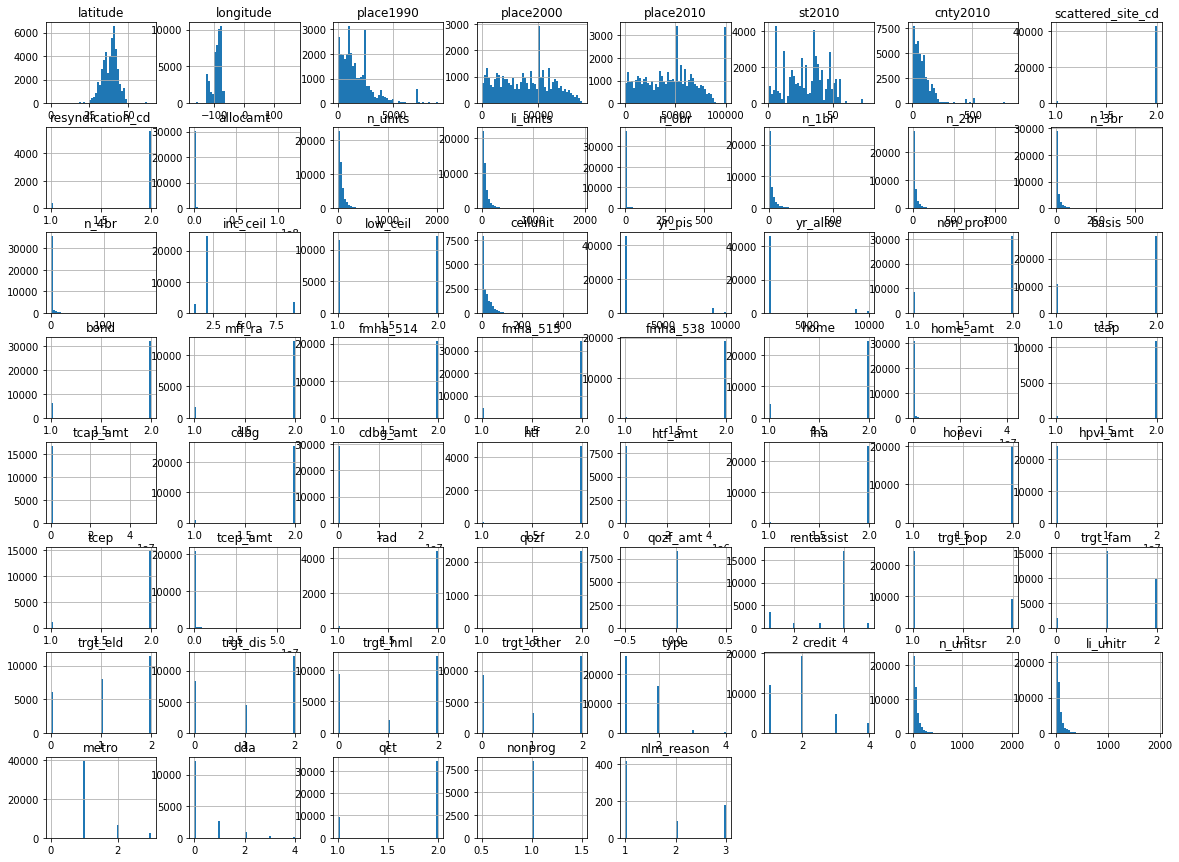

In [419]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(30,30))
plt.show()

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

In [ ]:
# corr["TARGET"].sort_values(ascending=False)